# **Übung 4** Programmierung mit Python mit Anwendungen aus dem Maschinellen Lernen

## Aufgabe 1

In der ersten Aufgabe geht darum Python Packages kennen zu lernen, um mit deren Funktionalität schnell und einfach verschiedenen Aufgaben lösen zu können.

Nachfolgende Zelle enthält die Funktion `get_linear_relationship_sample`. Diese generiert Werte nach folgender linearen Gleichung $f(x) = c0 + x*c1 + N(x)$. $N(x)$ stellt ein von $x$ abhängiges Rauschen da.

In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split


def get_value(x, c0, c1, nf):
    return c0 + c1 * x + (random.random()-0.5) * x * x * nf


def get_linear_relationship_sample(c0=9, c1=4, noise_factor=0.1):
    '''
    Erzeugt Punkte in einem bestimmten Bereich nach folgender Funktion f(x) = c0 + x*c1 + N(x)
    N ist ein Zufallsterm
    '''
    X, y = zip(*[(x, get_value(x, c0=c0, c1=c1, nf=noise_factor))
                 for x in np.arange(0.1, 15, 0.01)])
    X = np.array(X).reshape((len(X), 1))
    return train_test_split(
        X, y, test_size=0.2, random_state=0)


In [ ]:
import random
import numpy as np
from sklearn.model_selection import train_test_split


def get_value(x, c0, c1, nf):
    return c0 + c1 * x + (random.random()-0.5) * x * x * nf


Y =[(x, get_value(x, c0=9, c1=4, nf=0.1)) for x in np.arange(0.1, 15, 2)]
Y,y  =zip(*[(x, get_value(x, c0=9, c1=4, nf=0.1)) for x in np.arange(0.1, 15, 2)])
print(Y)
print(y)


(0.1, 2.1, 4.1, 6.1, 8.1, 10.1, 12.1, 14.1)
(9.399955251232676, 17.5031663005145, 25.422003545651247, 34.35171272719719, 40.18720407888052, 45.35194262685788, 59.728497767061334, 74.7725450056178)


Aufgabe 1.1 (Packages) | Importieren Sie die folgenden Module:
- `matplotlib.pyplot` unter dem Bezeichner `plt`
- von `sklearn.linear_model` die Klasse `LinearRegression`

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Aufgabe 1.2 (Packages) | Führen Sie mit Hilfe der importierten Packages eine Regressionanalyse durch. Die Daten sind durch `get_linear_relationship_sample` vorgegeben.

Zur Darstellung von Daten verwenden Sie das Package `matplotlib`
Diese bietet eine Vielzahl von Funktionen um Punkte, Linien und weitere geometische Objekte im 2d und 3d Raum darzustellen.

In Colab muss erscheinen Plots im Ausgabenbereich. Ein explizites `plt.show()` ist nicht erforderlich.

Führen Sie den Code aus und schauen Sie sich die Daten an.
X_train und y_train sind die x- und y-Koordinaten der Daten.


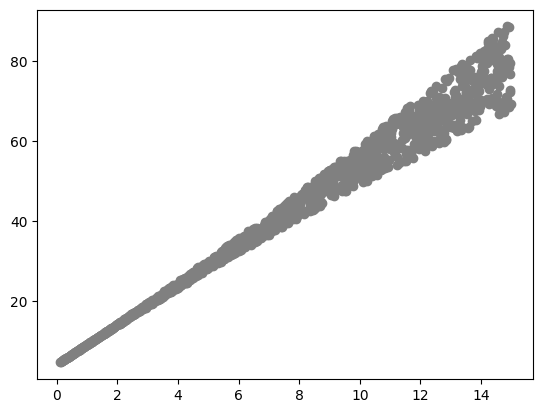

In [ ]:
X_train, X_test, y_train, _ = get_linear_relationship_sample(
    c0=4, c1=5)  # Laden der Daten
plt.scatter(X_train, y_train,  color='gray')  # plottet einzelne Punkte

Aufgabe 1.3 (Packages) | Führen Sie den Code aus und trainieren Sie die `LinearRegression`. Im Kontext des maschinellen Lernens bedeutet *trainieren* hier die Bestimmung einer Geraden (deswegen lineare Regression) durch die Datenpunkte, so dass der Abstand der Gerade zu den Punkten minimiert wird.

In [ ]:
reg_model = LinearRegression()  # Modell auswählen: lineare Regression
reg_model.fit(X_train, y_train)  # Modell trainieren: Gerade bestimmen
# Mit Hilfe des gelernten Modells prädizieren
y_pred = reg_model.predict(X_test)
# Mit Hilfe der Geraden können wir nun für Punkte mit beliebige
# x-Koordinate, die dazugehörige y-Koordinate vorhersagen
# oder prädizieren. Die x-Koordinaten der Punkte, die uns
# interessieren stehen in X_test.

Aufgabe 1.4 (Packages) | Führen Sie den Code aus und schauen Sie sich die prädizierten Werte (rot) an.

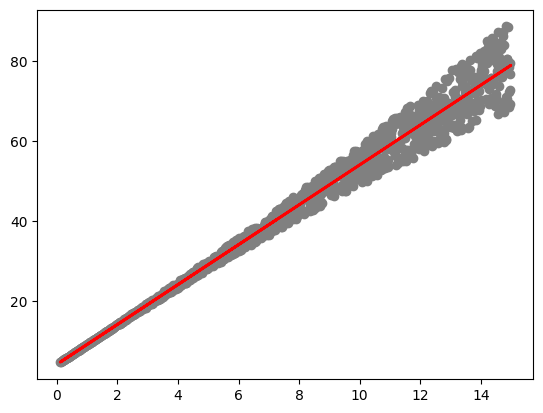

In [ ]:
plt.scatter(X_train, y_train,  color='gray')  # plottet einzelne Punkte
# plottet der Reihenfolge nach Linien zwischen den angegebenen Punkten
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

Aufgabe 1.5 (Packages) | Schauen Sie sich die Member von `reg_model`. Führen Sie den Code aus und überprüfen Sie die gelernten Koeffiziten mit den vorgegebenen Koeffiziten `c0` und `c1` der Funktion `get_linear_relationship_sample` (siehe Aufgabe 1.2).

In [ ]:
print(reg_model.coef_)  # c1
print(reg_model.intercept_)  # c0

[5.00341962]
4.027641950696648


## Aufgabe 2
In der zweiten Aufgabe geht darum Python Klassen kennen zu lernen.

Aufgabe 2.1 (Klassen) | Gegeben sei eine Klasse `Fahrzeug`

- Fügen Sie zu der Klasse `Fahrzeug` einen Konstruktor hinzu.
Dieser nimmt `anzahl_raeder` und `leistung_ps` als Parameter
- Schreiben Sie die Funktion `get_kw`, welche die PS Zahl des Autos in Kilowatt umrechnet
- Schreiben Sie die Funktion `get_properties`, welche die Eigenschaften des Autos aneinandergereiht als String zurückgibt

In [ ]:
class Fahrzeug:
    pass

Aufgabe 2.2 (Klassen) | Gegeben sei eine Klasse `FahrzeugEintrag`

- Fügen Sie zu der Klasse `FahrzeugEintrag` eine `@classmethod` `get_or_register_car(cls, nummernschild, fahrzeug)` hinzu. Diese nimmt ein `nummernschild` als String und ein `fahrzeug` der Klasse `Fahrzeug`. Neue Fahrzeuge sollen als `FahrzeugEintrag` Instanz im `fahrzeug_register` anhand des Nummernschilds eingetragen werden. Bereits gelistete Fahrzeuge sollen unverändert als `FahrzeugEintrag` Instanz zurückgegeben werden

- Schreiben Sie die Funktion `get_registered_car_info`, welche folgende Informationen ausgibt: `f'Das Auto mit Nummernschild {self.nummernschild} hat {self.fahrzeug.get_properties()}.`

- Testen Sie Ihre Klasse mit folgendem Code:
```python
# Fahrzeuge anlegen
car1 = Fahrzeug(4, 50)
car2 = Fahrzeug(4, 60)
car3 = Fahrzeug(4, 70)
# Fahrzeuge registrieren
a1 = FahrzeugEintrag.get_or_register_car('AB-TH-01', car1)
a2 = FahrzeugEintrag.get_or_register_car('AB-TH-01', car3) #  car1 wird nicht durch car3 überschrieben
b1 = FahrzeugEintrag.get_or_register_car('AB-TH-02', car2)
c1 = FahrzeugEintrag.get_or_register_car('AB-TH-03', car1) # es kann das identische Auto(Objekt) zweimal registiert werden
# Fahrzeug Infos anzeigen
a1.get_registered_car_info()
a2.get_registered_car_info()
b1.get_registered_car_info()
c1.get_registered_car_info()
```

In [ ]:
class FahrzeugEintrag():
    fahrzeug_register = {}

    def __init__(self, nummernschild, fahrzeug):
        self.fahrzeug = fahrzeug
        self.nummernschild = nummernschild